In [11]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Get the Data

In [55]:
df = pd.read_csv('ml-100k/u.data',sep='\t')
df.head()
df.shape

columns_name = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('ml-100k/u.data',sep='\t',names=columns_name)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [56]:
df['user_id'].nunique()

943

In [57]:
df['item_id'].nunique()

1682

In [58]:
df = df.drop('timestamp',axis=1)

In [59]:
df

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [151]:
movies_title = pd.read_csv('ml-100k/u.item',sep='\|',header=None)
movies_title.shape
movies_title = movies_title[[0,1]]
movies_title.head()
movies_title.columns = ['item_id','title']
movies_title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [62]:
df = pd.merge(df,movies_title,on='item_id')

In [64]:
df.tail()

,user_id,item_id,rating,title
99995,840,1674,4,Mamma Roma (1962)
99996,655,1640,3,"Eighth Day, The (1996)"
99997,655,1637,3,Girls Town (1996)
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,Dadetown (1995)


# Exploratory Data Analysis

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [153]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()
df.groupby('title').count()['rating'].sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [154]:
rating = pd.DataFrame(df.groupby('title').mean()['rating'])
rating['num of rating'] = df.groupby('title').count()['rating']

In [155]:
rating.sort_values(by='rating',ascending=False).head()

,rating,num of rating
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


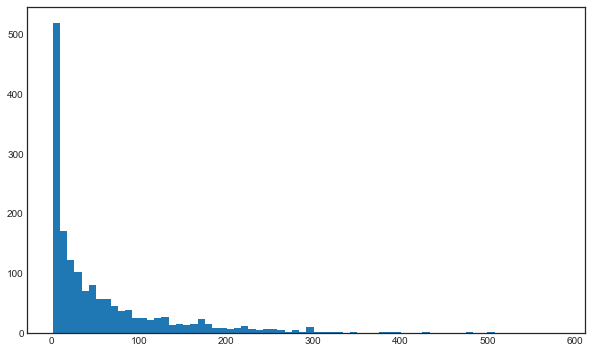

In [156]:
plt.figure(figsize=(10,6))
plt.hist(rating['num of rating'],bins=70)
plt.show()

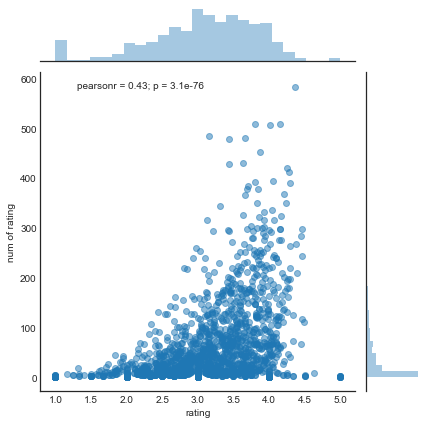

In [100]:
sns.jointplot(x='rating',y='num of rating',data=rating,alpha=0.5)

# Creating Movie Recommendation

In [157]:
movie_mat = df.pivot_table(index='user_id',columns='title',values='rating')
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [103]:
rating.sort_values('num of rating',ascending=False).head()

,rating,num of rating
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [199]:
starwar_user_rating = movie_mat['Star Wars (1977)']
starwar_user_rating.head()
similar_to_starwars=movie_mat.corrwith(starwar_user_rating)
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0


In [193]:
rating.head()

,rating,num of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [200]:
corr_starwars = corr_starwars.join(rating['num of rating'])


In [201]:
corr_starwars = corr_starwars.join(rating['rating'])

In [202]:
corr_starwars.head()
corr_starwars[corr_starwars['num of rating']>100].sort_values('correlation',ascending=False)

,correlation,num of rating,rating
title,,,
Star Wars (1977),1.000000,583,4.358491
"Empire Strikes Back, The (1980)",0.747981,367,4.204360
Return of the Jedi (1983),0.672556,507,4.007890
Raiders of the Lost Ark (1981),0.536117,420,4.252381
Austin Powers: International Man of Mystery (1997),0.377433,130,3.246154
"Sting, The (1973)",0.367538,241,4.058091
Indiana Jones and the Last Crusade (1989),0.350107,331,3.930514
Pinocchio (1940),0.347868,101,3.673267
"Frighteners, The (1996)",0.332729,115,3.234783


# Prediction Function

In [203]:
def predict_movies(movie_name):
    movie_user_rating = movie_mat[movie_name]
    similar_to_movie = movie_mat.corrwith(movie_user_rating)
    corr_movie = pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join([rating['num of rating']])
    corr_movie = corr_movie.join([rating['rating']])
    corr_movie = corr_movie.rename(columns={'rating':'average rating'})
    prediction = corr_movie[corr_movie['num of rating']>100].sort_values('correlation',ascending=False)
    return prediction
    
    

In [204]:
predictions = predict_movies("Raiders of the Lost Ark (1981)")
predictions.head()

,correlation,num of rating,average rating
title,,,
Raiders of the Lost Ark (1981),1.000000,420,4.252381
Indiana Jones and the Last Crusade (1989),0.539606,331,3.930514
"Empire Strikes Back, The (1980)",0.538659,367,4.204360
Star Wars (1977),0.536117,583,4.358491
Back to the Future (1985),0.506807,350,3.834286
